In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighbors_Classifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras import models
from keras import Model
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install scikit-plot
import scikitplot as skplt

In [50]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
data = data.drop('customerID', axis =1)

In [54]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce', downcast = 'float')

In [55]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['TotalCharges']] = imputer.fit_transform(data[['TotalCharges']])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [58]:
new_data = data.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [60]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.500000,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.899902,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.450012,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.600006,1


In [61]:
correlation_matrix = data.corr()
important_features = correlation_matrix["Churn"].abs().sort_values(ascending=False)
selected_features = important_features[1:7].index

selected_features


Index(['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges',
       'OnlineBackup'],
      dtype='object')

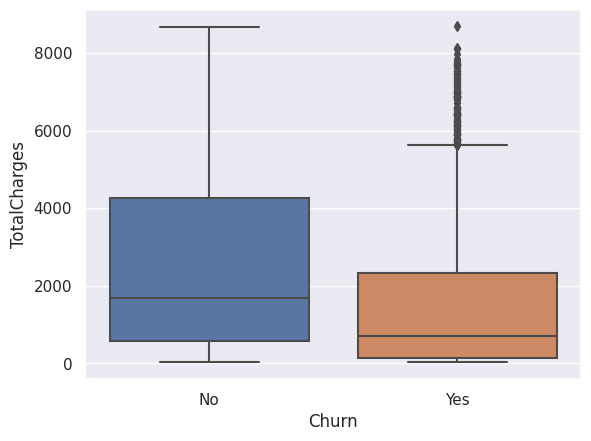

It shows that when the total charges are lower, the churn is higher




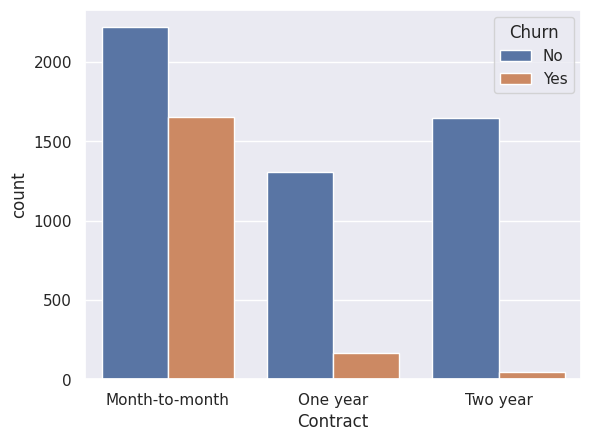

It shows that month to month contracts have the most churns




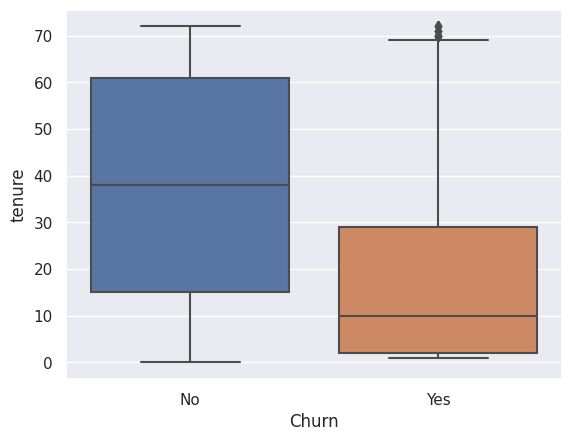

It shows that shorter tenures have more churns




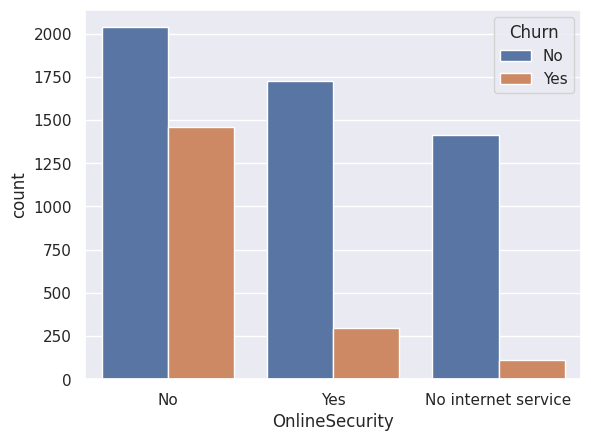

It shows that no online security has the most churns




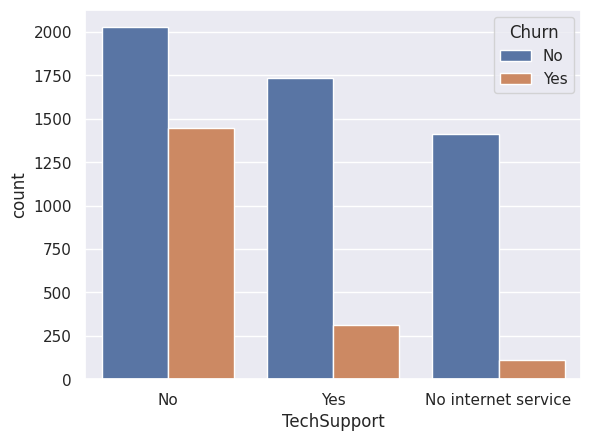

It shows that no tech support has the most churns




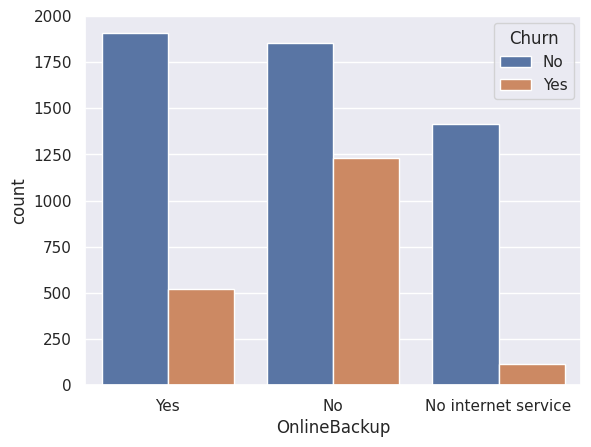

It shows that when there is no online backup there are more churns




In [62]:
# Visualize distribution of 'TotalCharges' for churned and non-churned customers
sns.boxplot(x='Churn', y='TotalCharges', data=new_data)
plt.show()
print("It shows that when the total charges are lower, the churn is higher")
print()
print()

# Visualize the relationship between 'Contract' and churn
sns.countplot(x='Contract', hue='Churn', data=new_data)
plt.show()
print("It shows that month to month contracts have the most churns")
print()
print()

# Visualize the relationship between 'tenure' and churn
sns.boxplot(x='Churn', y='tenure', data=new_data)
plt.show()
print("It shows that shorter tenures have more churns")
print()
print()

# Visualize the relationship between 'OnlineSecurity' and churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=new_data)
plt.show()
print("It shows that no online security has the most churns")
print()
print()

# Visualize the relationship between 'TechSupport' and churn
sns.countplot(x='TechSupport', hue='Churn', data=new_data)
plt.show()
print("It shows that no tech support has the most churns")
print()
print()

# Visualize the relationship between 'OnlineBackup' and churn
sns.countplot(x='OnlineBackup', hue='Churn', data=new_data)
plt.show()
print("It shows that when there is no online backup there are more churns")
print()
print()

In [63]:
y = data['Churn']
X = data[selected_features]

In [64]:
selected_features

Index(['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges',
       'OnlineBackup'],
      dtype='object')

In [65]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X.copy())


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

data = pd.concat([X_scaled_df, y], axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


In [68]:
# Keras Functional API model

#Input layer
input_layer = Input(shape=(X_train.shape[1],))

#Hidden layer
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)


#)Outputvlayer
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/120
177/177 [==============================] - 3s 8ms/step - loss: 5.4372 - accuracy: 0.6521 - val_loss: 0.5022 - val_accuracy: 0.7239
Epoch 2/120
177/177 [==============================] - 1s 5ms/step - loss: 0.5675 - accuracy: 0.7002 - val_loss: 0.5138 - val_accuracy: 0.7268
Epoch 3/120
177/177 [==============================] - 1s 5ms/step - loss: 0.5548 - accuracy: 0.7064 - val_loss: 0.5256 - val_accuracy: 0.6998
Epoch 4/120
177/177 [==============================] - 1s 4ms/step - loss: 0.5574 - accuracy: 0.7167 - val_loss: 0.5980 - val_accuracy: 0.7282
Epoch 5/120
177/177 [==============================] - 1s 4ms/step - loss: 0.5866 - accuracy: 0.7290 - val_loss: 0.9446 - val_accuracy: 0.6082
Epoch 6/120
177/177 [==============================] - 1s 5ms/step - loss: 0.6102 - accuracy: 0.7263 - val_loss: 0.4855 - val_accuracy: 0.7367
Epoch 7/120
177/177 [==============================] - 1s 7ms/step - loss: 0.6069 - accuracy: 0.7311 - val_loss: 0.5598 - val_accuracy: 0.7757

In [70]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 1s 4ms/step - loss: 0.8082 - accuracy: 0.7760


77.6002824306488

In [71]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.7807
Test Loss: 0.7417
Test Accuracy: 78.0696


In [72]:
!pip install keras tuner

  Using cached tuner-1.0.0b2-py3-none-any.whl (13 kB)
  Using cached Kivy-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.9 MB)
  Using cached pymlconf-3.0.1-py3-none-any.whl
  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Kivy_Garden-0.1.5-py3-none-any.whl (4.6 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [73]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=96, step=32)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        model.add(layers.Dense(units=units, activation=activation))

    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [74]:
build_model(keras_tuner.HyperParameters())

In [75]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

Reloading Tuner from tuning_dir/samples/tuner0.json


In [76]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))

In [77]:
best_model = tuner.get_best_models(num_models=2)[0]

In [78]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 96)                6240      
                                                                 
 dense_2 (Dense)             (None, 1)                 97        
                                                                 
Total params: 6785 (26.50 KB)
Trainable params: 6785 (26.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [80]:
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

Accuracy: 0.8069552874378992
AUC Score: 0.8517977475752274


In [81]:
best_model.save("best_model.h5")


In [82]:
import pickle
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)